<a href="https://colab.research.google.com/github/SylviaNice/7162856-G-rez-Git-et-GitHub/blob/main/Projet_Bottleneck_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Python - Optimiser la gestion des données pour Bottleneck

In [1006]:
# 1. Nettoyage de l'environnement (efface toutes les variables en mémoire)

%reset -f

In [1007]:
# 2. Installation des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [1008]:
# 3. Importation des données

from google.colab import files
uploaded = files.upload()

Saving Fichier_web.xlsx to Fichier_web (27).xlsx
Saving Fichier_erp.xlsx to Fichier_erp (27).xlsx
Saving fichier_liaison.xlsx to fichier_liaison (27).xlsx


In [1009]:
# 4. Chargement des 3 fichiers

erp_file = "Fichier_erp.xlsx"
web_file = "Fichier_web.xlsx"
liaison_file = "fichier_liaison.xlsx"

In [1010]:
# 5. Lecture des fichiers

erp_df = pd.read_excel(erp_file)
web_df = pd.read_excel(web_file)
liaison_df = pd.read_excel(liaison_file)

In [1011]:
# 6. Aperçu des premières lignes des fichiers importés

display(erp_df.head())
display(web_df.head())
display(liaison_df.head())

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,NaN,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,NaN,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,NaN,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,NaN,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,NaN,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,NaN,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,NaN,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,NaN,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [1012]:
# 7. Nombre de lignes et de colonnes de chacun des 3 fichiers

print(erp_df.shape)
print(web_df.shape)
print(liaison_df.shape)

(825, 5)
(1513, 28)
(825, 2)


In [1013]:
# 8. Affichage du nom et du type de chaque colonne pour les fichiers erp, web et liaison

print(erp_df.dtypes)
print("-" * 40)
print(web_df.dtypes)
print("-" * 40)
print(liaison_df.dtypes)
print("-" * 40)

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object
----------------------------------------
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_g

In [1014]:
# 28. # Corriger l'erreur dans les numéros sku (supprimer les indices)

print(liaison_df.columns.tolist())

['product_id', 'id_web']


In [1015]:
# Remplacer la chaîne '-1' par une chaîne vide
liaison_df['id_web'] = liaison_df['id_web'].astype(str).str.replace('-1', '')

In [1016]:
# Afficher toutes les incohérences dans les stocks fichier erp

stocks_negatifs = erp_df[erp_df['stock_quantity'] < 0]
print("Stocks négatifs :")
print(stocks_negatifs)

Stocks négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock


In [1017]:
# Corriger les stocks négatifs
erp_df['stock_quantity'] = erp_df['stock_quantity'].abs()
erp_df['stock_quantity'] = erp_df['stock_quantity'].clip(lower=0)

In [1018]:
# 9. Supprimer les colonnes inutiles

columns_to_drop_exist = [
    "virtual",
    "downloadable",
    "rating_count",
    "average_rating",
    "tax_class",
    "post_content",
    "post_status",
    "comment_status",
    "ping_status",
    "post_password",
    "post_content_filtered",
    "post_parent",
    "menu_order",
    "comment_count"
]
columns_to_drop_exist = [col for col in columns_to_drop_exist if col in web_df.columns]
web_df = web_df.drop(columns=columns_to_drop_exist)
print(web_df.dtypes)

sku                          object
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
post_mime_type               object
dtype: object


In [1019]:
# 10. Renommer la colonne (rectification de l'erreur de la stagiaire)

liaison_df = pd.read_excel("fichier_liaison.xlsx")
liaison_df = liaison_df.rename(columns={'id_web': 'sku'})
print(liaison_df.head)

<bound method NDFrame.head of      product_id                  sku
0          3847                15298
1          3849                15296
2          3850                15300
3          4032                19814
4          4039                19815
5          4040                15303
6          4041                14975
7          4042                16042
8          4043                14980
9          4045                16041
10         4046                15269
11         4047                14977
12         4048                16044
13         4049                16043
14         4050                16449
15         4051                16045
16         4052                16030
17         4053                13127
18         4054                19816
19         4055                  NaN
20         4056                16029
21         4057                16039
22         4058                16318
23         4059                16275
24         4060                16498
25      

In [1020]:
# 11. Affichage des données manquantes

print(liaison_df[liaison_df.isna().any(axis=1)])

     product_id  sku
19         4055  NaN
49         4090  NaN
50         4092  NaN
119        4195  NaN
131        4209  NaN
151        4233  NaN
184        4278  NaN
185        4279  NaN
234        4565  NaN
238        4577  NaN
239        4578  NaN
242        4594  NaN
246        4599  NaN
292        4659  NaN
318        4692  NaN
319        4693  NaN
320        4697  NaN
321        4698  NaN
322        4702  NaN
340        4721  NaN
352        4738  NaN
356        4744  NaN
384        4798  NaN
396        4874  NaN
416        4911  NaN
449        4973  NaN
469        5017  NaN
472        5020  NaN
486        5070  NaN
487        5075  NaN
541        5560  NaN
547        5569  NaN
618        5805  NaN
621        5808  NaN
659        5952  NaN
696        6125  NaN
724        6324  NaN
726        6327  NaN
739        6594  NaN
761        6821  NaN
762        6824  NaN
763        6825  NaN
764        6826  NaN
765        6864  NaN
766        6866  NaN
767        6869  NaN
768        68

In [1021]:
# 12. Détecter les colonnes avec des valeurs manquantes pour les fichiers

print("Colonnes avec valeurs manquantes - ERP")
print(erp_df.isna().sum()
[erp_df.isna().sum() > 0])
print("-" * 40)

print("Colonnes avec valeurs manquantes - Web")
print(web_df.isna().sum()
[web_df.isna().sum() > 0])
print("-" * 40)

print("Colonnes avec valeurs manquantes - Liaison")
print(liaison_df.isna().sum()
[liaison_df.isna().sum() > 0])
print("-" * 40)

Colonnes avec valeurs manquantes - ERP
Series([], dtype: int64)
----------------------------------------
Colonnes avec valeurs manquantes - Web
sku                   85
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_name             83
post_modified         83
post_modified_gmt     83
guid                  83
post_type             83
post_mime_type       799
dtype: int64
----------------------------------------
Colonnes avec valeurs manquantes - Liaison
sku    91
dtype: int64
----------------------------------------


In [1022]:
# 14. Visualiser les doublons

doublons_erp = erp_df.duplicated(keep=False)
doublons_web = web_df.duplicated(keep=False)
doublons_liaison = liaison_df.duplicated(keep=False)
print(doublons_erp, doublons_web, doublons_liaison)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [1023]:
# 15. Supprimer les doublons

erp_df.drop_duplicates(inplace=True)
web_df.drop_duplicates(inplace=True)
liaison_df.drop_duplicates(inplace=True)
print(len(erp_df), len(web_df), len(liaison_df))

825 1431 825


In [1024]:
# 16. Vérifier que les doublons ont bien été supprimés

print("Doublons ERP :", erp_df.duplicated().sum())
print("Doublons Web :", web_df.duplicated().sum())
print("Doublons Liaison :", liaison_df.duplicated().sum())
print(erp_df.shape)
print(web_df.shape)
print(liaison_df.shape)

Doublons ERP : 0
Doublons Web : 0
Doublons Liaison : 0
(825, 5)
(1431, 14)
(825, 2)


In [1025]:
# 17. Supprimer les lignes entièrement vides de mes fichiers

web_df.dropna(how='all', inplace=True)
erp_df.dropna(how='all', inplace=True)
liaison_df.dropna(how='all', inplace=True)
print(len(erp_df), len(web_df), len(liaison_df))

825 1430 825


In [1026]:
# 18. Enregistrement des fichiers nettoyés erp et liaison

erp_df.to_excel("Fichier_erp_clean.xlsx", index=False)
liaison_df.to_excel("fichier_liaison_clean.xlsx", index=False)
web_df.to_excel("Fichier_web_clean.xlsx", index=False)
files.download("Fichier_web_clean.xlsx")
files.download("Fichier_erp_clean.xlsx")
files.download("fichier_liaison_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1027]:
# 19. Supprimer les doublons sur les clés avant la fusion

erp_df = erp_df.drop_duplicates(subset=['product_id'])
liaison_df = liaison_df.drop_duplicates(subset=['product_id', 'sku'])
web_df = web_df.drop_duplicates(subset=['sku'])
files.download("Fichier_web_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1028]:
# 20. Fusion du fichier erp avec le fichier liaison

erp_df = pd.read_excel("Fichier_erp_clean.xlsx")
liaison_df = pd.read_excel("fichier_liaison_clean.xlsx")
erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='inner')
print(erp_liaison)
print(erp_liaison.shape)

     product_id  onsale_web   price  stock_quantity stock_status  \
0          3847           1   24.20               0   outofstock   
1          3849           1   34.30               0   outofstock   
2          3850           1   20.80               0   outofstock   
3          4032           1   14.10               0   outofstock   
4          4039           1   46.00               0   outofstock   
5          4040           1   34.30               0   outofstock   
6          4041           1   32.70              15      instock   
7          4042           1   31.20              34      instock   
8          4043           1   60.00              12      instock   
9          4045           1   42.60              66      instock   
10         4046           1   80.00               0   outofstock   
11         4047           1   18.30              36      instock   
12         4048           1   22.80              22      instock   
13         4049           1   19.30             

In [1029]:
# 21. Fusion du fichier erp_liaison et du fichier web

erp_liaison_web = pd.merge(erp_liaison, web_df, on='sku', how='left')
print(erp_liaison_web.shape)
print(erp_liaison_web.dtypes)

(825, 19)
product_id                    int64
onsale_web                    int64
price                       float64
stock_quantity                int64
stock_status                 object
sku                          object
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
post_mime_type               object
dtype: object


In [1030]:
# 22. Enregistrement et téléchargement du nouveau fichier de travail

erp_liaison_web.to_excel("erp_liaison_web.xlsx", index=False)
from google.colab import files
files.download("erp_liaison_web.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1031]:
# 23. Visualiser la cellule erreur "bon-cadeau-25-euros"

print(erp_liaison_web.loc[440:449, ['sku']])

                     sku
440                13379
441                15338
442                15337
443  bon-cadeau-25-euros
444                15737
445                15958
446                16515
447                16586
448                11225
449                  NaN


In [1032]:
# 24. Remplacer la cellule "bon-cadeau-25-euros" par une cellule vide

erp_liaison_web.loc[443, 'sku'] = "NaN"
print(erp_liaison_web.loc[440:449, ['sku']])

       sku
440  13379
441  15338
442  15337
443    NaN
444  15737
445  15958
446  16515
447  16586
448  11225
449    NaN


In [1033]:
# 25. Détecter les incohérences de prix : prix négatifs

erp_df[erp_df['price'] <= 0]

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


In [1034]:
# 26. Tranformer les valeurs négatives des prix en valeurs positives

erp_df['price'] = erp_df['price'].abs()
erp_df[erp_df['price'] <= 0]
erp_df.to_excel("erp_df.xlsx", index=False)
files.download("erp_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1035]:
# Supprimer les indices -1 dans la colonne 'sku' du fichier final

erp_liaison_web['sku'] = erp_liaison_web['sku'].astype(str)
erp_liaison_web['sku'] = erp_liaison_web['sku'].str.replace(r'-1$', '', regex=True)
print(erp_liaison_web['sku'])
# Sauvegarder les modifications dans un nouveau fichier Excel
erp_liaison_web.to_excel("erp_liaison_web.xlsx", index=False)
files.download("erp_liaison_web.xlsx")

0      15298
1      15296
2      15300
3      19814
4      19815
5      15303
6      14975
7      16042
8      14980
9      16041
10     15269
11     14977
12     16044
13     16043
14     16449
15     16045
16     16030
17     13127
18     19816
19       nan
20     16029
21     16039
22     16318
23     16275
24     16498
25     16320
26     16319
27     15966
28     15022
29     15967
30     15490
31     16416
32     11862
33     15444
34     15953
35     12045
36     13074
37     15941
38     16069
39     13072
40     15440
41     13435
42     13078
43     13117
44     16296
45     16014
46     16462
47     16013
48     16180
49       nan
50       nan
51     15676
52     16120
53     15564
54     15675
55     15378
56     15813
57     13416
58     14905
59     15767
60     16505
61     15683
62     16504
63     15787
64     14800
65     15353
66     15382
67     15339
68     11668
69     13209
70     15341
71     13217
72       304
73     11641
74      1662
75      1360
76     15648

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1041]:
# 27. Calcul du CA par ligne et par colonne

import pandas as pd
stocks_negatifs = erp_liaison_web[erp_liaison_web['stock_quantity'] < 0]
# Corriger les stocks négatifs
erp_liaison_web['stock_quantity'] = erp_liaison_web['stock_quantity'].abs()
erp_liaison_web['stock_quantity'] = erp_liaison_web['stock_quantity'].clip(lower=0)

# 27. Calcul du CA par ligne et par colonne
erp_liaison_web['CA'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']

# Calcul du CA total
CA_total = erp_liaison_web['CA'].sum()
print("CA total :", CA_total)

# Afficher les colonnes disponibles
print(erp_liaison_web.columns)

# Sauvegarder le DataFrame avec la colonne CA dans un nouveau fichier Excel
erp_liaison_web.to_excel("erp_liaison_web_CA.xlsx", index=False)

print("Fichier sauvegardé : erp_liaison_web_CA.xlsx")
files.download("erp_liaison_web_CA.xlsx")

CA total : 74861.4
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'sku', 'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'post_title', 'post_excerpt', 'post_name',
       'post_modified', 'post_modified_gmt', 'guid', 'post_type',
       'post_mime_type', 'CA'],
      dtype='object')
Fichier sauvegardé : erp_liaison_web_CA.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1037]:
# Détection des outliers dans les prix

z_scores = zscore(erp_liaison_web['price'])
threshold = 3
outliers = erp_liaison_web[np.abs(z_scores) > threshold]
print(outliers)

     product_id  onsale_web  price  stock_quantity stock_status    sku  \
208        4352           1  225.0               0   outofstock  15940   
210        4355           1  126.5               2      instock  12589   
227        4402           1  176.0               8      instock   3510   
230        4406           1  157.0               3      instock   7819   
242        4594           1  144.0               0   outofstock    nan   
411        4904           1  137.0              13      instock  14220   
460        5001           1  217.5              20      instock  14581   
556        5612           1  124.8              12      instock  14915   
598        5767           1  175.0              12      instock  15185   
635        5892           1  191.3              10      instock  14983   
651        5917           1  122.0               4      instock  14775   
652        5918           1  114.0               8      instock  14773   
697        6126           1  135.0    

In [1043]:
import pandas as pd

# Transformer toutes les valeurs négatives de 'price' en positives
erp_liaison_web['price'] = erp_liaison_web['price'].abs()

# 27. Calcul du CA par ligne
erp_liaison_web['CA'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']

# Calcul du CA total
CA_total = erp_liaison_web['CA'].sum()
print("CA total :", CA_total)

# Afficher les colonnes disponibles
print(erp_liaison_web.columns)

# Sauvegarder le DataFrame dans un fichier Excel
erp_liaison_web.to_excel("erp_liaison_web_CA.xlsx", index=False)
print("Fichier sauvegardé : erp_liaison_web_CA.xlsx")

# Télécharger le fichier (si tu es dans Google Colab)
from google.colab import files
files.download("erp_liaison_web_CA.xlsx")


CA total : 74915.4
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'sku', 'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'post_title', 'post_excerpt', 'post_name',
       'post_modified', 'post_modified_gmt', 'guid', 'post_type',
       'post_mime_type', 'CA'],
      dtype='object')
Fichier sauvegardé : erp_liaison_web_CA.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1044]:
print("Prix négatifs restants :", (erp_liaison_web['price'] < 0).sum())
print("Quantités négatives restantes :", (erp_liaison_web['total_sales'] < 0).sum())

Prix négatifs restants : 0
Quantités négatives restantes : 0


In [1045]:
print(erp_liaison_web['price'].describe())
print(erp_liaison_web['total_sales'].describe())

count    825.000000
mean      32.405818
std       26.805885
min        1.000000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64
count    805.000000
mean       3.724224
std        7.186636
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       96.000000
Name: total_sales, dtype: float64


In [1046]:
# Recalcul du CA par ligne
erp_liaison_web['CA_calc'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']

# Trier les lignes par CA décroissant pour repérer les valeurs suspectes
erp_liaison_web.sort_values('CA_calc', ascending=False).head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,CA,CA_calc
203,4334,1,49.0,0,outofstock,7818,96.0,taxable,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,4704.0,4704.0
227,4402,1,176.0,8,instock,3510,13.0,taxable,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,2288.0,2288.0
73,4142,1,53.0,8,instock,11641,30.0,NaN,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,NaN,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,1590.0,1590.0
72,4141,1,39.0,1,instock,304,40.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1560.0,1560.0
210,4355,1,126.5,2,instock,12589,11.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1391.5,1391.5
208,4352,1,225.0,0,outofstock,15940,5.0,NaN,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,1125.0,1125.0
82,4153,1,29.0,0,outofstock,16237,36.0,taxable,2.0,2018-02-13 14:13:53,2018-02-13 13:13:53,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est tr...",elian-daros-cotes-du-marmandais-clos-baquey-2015,2020-07-28 15:25:03,2020-07-28 13:25:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1044.0,1044.0
706,6206,1,25.2,120,instock,16580,41.0,NaN,2.0,2019-07-24 09:31:48,2019-07-24 07:31:48,Domaine Giudicelli Patrimonio Blanc 2019,NaN,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 10:12:58,2020-08-27 08:12:58,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,1033.2,1033.2
17,4053,1,44.3,16,instock,13127,23.0,taxable,2.0,2018-02-12 11:18:33,2018-02-12 10:18:33,Clos du Mont-Olivet Châteauneuf-du-Pape 2012,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2012,2020-08-24 18:25:02,2020-08-24 16:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,1018.9,1018.9
243,4596,1,43.9,0,outofstock,15476,23.0,NaN,2.0,2018-04-13 13:27:19,2018-04-13 11:27:19,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,NaN,marc-colin-et-fils-chassagne-montrachet-blanc-...,2020-08-26 09:35:02,2020-08-26 07:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg,1009.7,1009.7


In [1049]:
# Doublons basés uniquement sur le SKU (ou 'id_web' selon ton fichier)
doublons_sku = erp_liaison_web[erp_liaison_web.duplicated(subset=['sku'], keep=False)]
print("Nombre de doublons SKU :", doublons_sku.shape[0])
print(doublons_sku)

Nombre de doublons SKU : 95
     product_id  onsale_web  price  stock_quantity stock_status    sku  \
17         4053           1   44.3              16      instock  13127   
19         4055           0   86.1               1   outofstock    nan   
49         4090           0   73.0               6   outofstock    nan   
50         4092           0   47.0               6   outofstock    nan   
119        4195           0   14.1               0   outofstock    nan   
131        4209           0   73.5               0   outofstock    nan   
151        4233           0   20.0               0   outofstock    nan   
184        4278           0   21.5               0   outofstock    nan   
185        4279           0   10.8               0   outofstock    nan   
234        4565           0   30.5               3      instock    nan   
238        4577           0   49.0               1      instock    nan   
239        4578           0   40.0               3      instock    nan   
242       

In [1050]:
# Regrouper par SKU et voir s'il y a plusieurs valeurs différentes
doublons_detail = erp_liaison_web.groupby('sku').filter(lambda x: len(x) > 1)
print(doublons_detail.sort_values('sku'))

     product_id  onsale_web  price  stock_quantity stock_status    sku  \
17         4053           1   44.3              16      instock  13127   
822        7247           1   54.8              23      instock  13127   
363        4757           1   26.5               1      instock  14680   
823        7329           0   26.5              14      instock  14680   
119        4195           0   14.1               0   outofstock    nan   
798        7087           0   30.0              91      instock    nan   
797        7086           0   26.0               2      instock    nan   
796        7085           0   30.0               8      instock    nan   
795        7084           0   45.0               7      instock    nan   
794        7081           0   45.0              17      instock    nan   
791        7015           0   45.0              12      instock    nan   
790        7010           0   47.0              37      instock    nan   
789        7009           0   40.0    

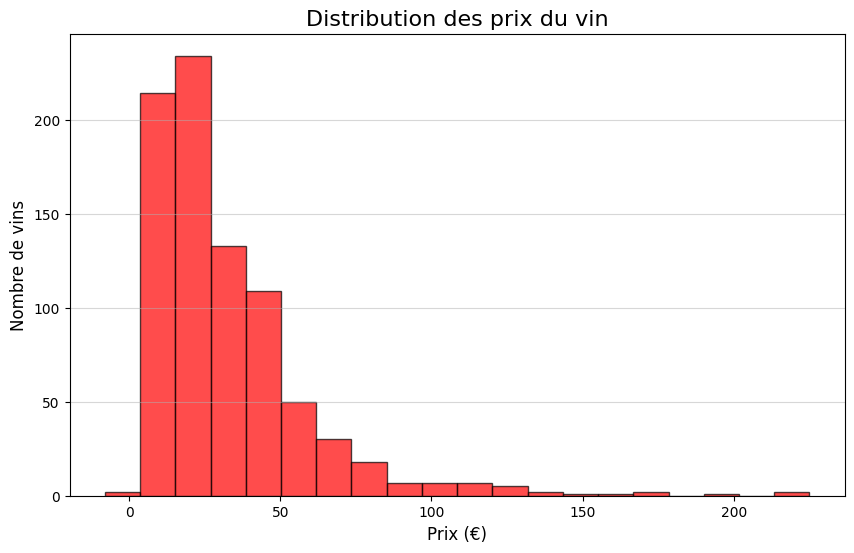

In [1038]:
# Distribution des prix du vin

plt.figure(figsize=(10, 6))
plt.hist(erp_liaison_web['price'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title("Distribution des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.ylabel("Nombre de vins", fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

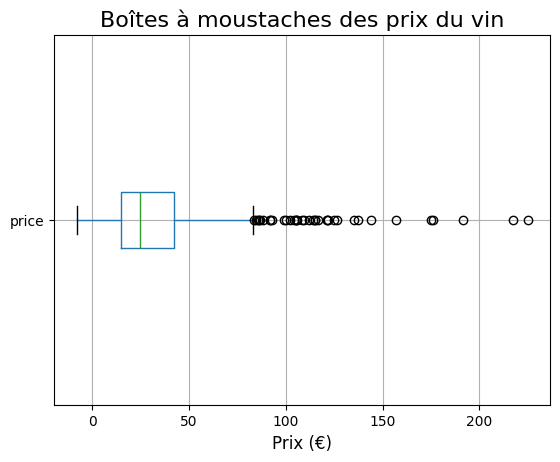

In [1039]:
# Représentation graphique des outliers dans les prix du vin

erp_liaison_web.boxplot(column="price", vert=False)
plt.title("Boîtes à moustaches des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.show()